In [116]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
assets = ['ASIANPAINT.NS', 'HCLTECH.NS', 'INFY.NS', 'ITC.NS', 'BAJAJFINSV.NS']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2011-1-1')['Adj Close']

In [119]:
pf_data.head()

,ASIANPAINT.NS,HCLTECH.NS,INFY.NS,ITC.NS,BAJAJFINSV.NS
Date,,,,,
2011-01-03,263.141418,94.296700,339.148895,91.698257,456.344421
2011-01-04,259.630768,95.750114,341.414215,93.114639,454.210144
2011-01-05,263.686035,98.075615,339.271454,94.321205,450.863251
2011-01-06,260.848267,99.186432,341.090607,93.849068,440.919464
2011-01-07,254.097031,96.601418,330.558258,90.491692,432.527985


<AxesSubplot:xlabel='Date'>

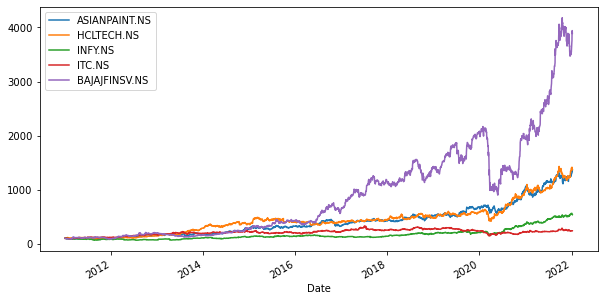

In [120]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [121]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [122]:
log_returns.mean() * 250

ASIANPAINT.NS    0.240276
HCLTECH.NS       0.240919
INFY.NS          0.154421
ITC.NS           0.079910
BAJAJFINSV.NS    0.337135
dtype: float64

In [123]:
log_returns.cov() * 250

,ASIANPAINT.NS,HCLTECH.NS,INFY.NS,ITC.NS,BAJAJFINSV.NS
ASIANPAINT.NS,0.067101,0.012472,0.011749,0.014739,0.025279
HCLTECH.NS,0.012472,0.082252,0.039550,0.012902,0.015133
INFY.NS,0.011749,0.039550,0.079982,0.010161,0.015762
ITC.NS,0.014739,0.012902,0.010161,0.067536,0.022004
BAJAJFINSV.NS,0.025279,0.015133,0.015762,0.022004,0.124073


In [124]:
log_returns.corr()

,ASIANPAINT.NS,HCLTECH.NS,INFY.NS,ITC.NS,BAJAJFINSV.NS
ASIANPAINT.NS,1.000000,0.167879,0.160370,0.218939,0.277043
HCLTECH.NS,0.167879,1.000000,0.487612,0.173102,0.149801
INFY.NS,0.160370,0.487612,1.000000,0.138253,0.158221
ITC.NS,0.218939,0.173102,0.138253,1.000000,0.240378
BAJAJFINSV.NS,0.277043,0.149801,0.158221,0.240378,1.000000


In [125]:
num_assets = len(assets)

In [126]:
num_assets

5

In [127]:
arr = np.random.random(2)
arr

array([0.28106754, 0.98700774])

In [128]:
arr[0] + arr[1]

1.2680752723640638

In [129]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.28310974, 0.31576359, 0.16263419, 0.16092439, 0.07756809])

In [130]:
weights[0] + weights[1]

0.5988733317166568

In [131]:
np.sum(weights * log_returns.mean()) * 250

0.20822229527159533

Expected Portfolio Variance

In [132]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.03154862172665687

In [133]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.17761931687363533

In [134]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.143464053840679,
  0.2190317289744192,
  0.21580500735804412,
  0.2268597656832728,
  0.2327966019994855,
  0.23146758825590813,
  0.19816126223020486,
  0.21429597255636182,
  0.19939823044434057,
  0.18852755187054612,
  0.2480997853107486,
  0.2210698954699856,
  0.2279853480037217,
  0.23504608535532742,
  0.17962777615383396,
  0.2173476893226528,
  0.21693932786344922,
  0.210979640803736,
  0.24801457188400572,
  0.20201978681018443,
  0.22229104050230128,
  0.2223880789759411,
  0.19776864713466394,
  0.22804023417220012,
  0.20467108575235107,
  0.19243522335142238,
  0.22992395116769018,
  0.2000591677241356,
  0.22169643014914844,
  0.22909752291128033,
  0.1949456847125642,
  0.1576851801501789,
  0.2124652476463205,
  0.2270241192542252,
  0.22648269040059144,
  0.16292595556919773,
  0.1945274256496959,
  0.22280854445385895,
  0.24095449226044247,
  0.18600412451745496,
  0.2025640362882425,
  0.1934896141445418,
  0.17457520420702471,
  0.14951003106859978,
  0.2418

In [135]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.18294287, 0.18977996, 0.1682302 , 0.22187215, 0.21037102,
        0.18990086, 0.19443951, 0.18178402, 0.19902096, 0.21599378,
        0.22165278, 0.24738302, 0.24092289, 0.2080992 , 0.23579568,
        0.22624172, 0.17306731, 0.20839817, 0.17518414, 0.21562015,
        0.24103956, 0.18986719, 0.23338411, 0.1893982 , 0.20921655,
        0.21081483, 0.225061  , 0.21992116, 0.20557981, 0.21038077,
        0.23754019, 0.18584264, 0.21860647, 0.19584274, 0.23129637,
        0.18686509, 0.20721401, 0.23916719, 0.24478649, 0.20950941,
        0.24217754, 0.20085836, 0.24756124, 0.25198007, 0.22451618,
        0.17829482, 0.21498818, 0.21611641, 0.23673434, 0.20788331,
        0.25434373, 0.17837316, 0.1946718 , 0.21317093, 0.20546405,
        0.23347209, 0.21004922, 0.19183701, 0.2014569 , 0.19501868,
        0.1562829 , 0.23049857, 0.19351768, 0.18663617, 0.21604269,
        0.19234768, 0.22777787, 0.17229568, 0.18910247, 0.18095941,
        0.18716074, 0.1986827 , 0.17880874, 0.21

In [136]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [137]:
portfolios.head()

,Return,Volatility
0,0.182943,0.181247
1,0.189780,0.190032
2,0.168230,0.178291
3,0.221872,0.210785
4,0.210371,0.178287


Text(0, 0.5, 'Expected Return')

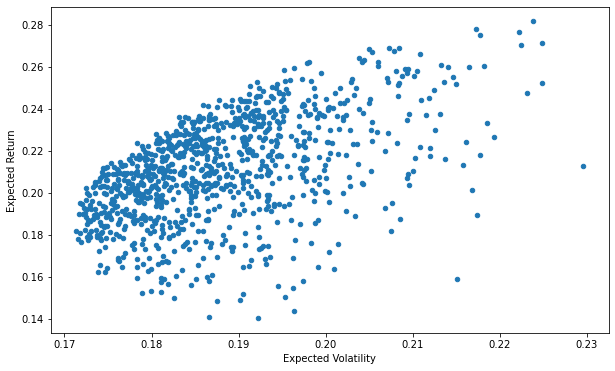

In [138]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')